In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from sklearn import neighbors
from matplotlib.colors import ListedColormap

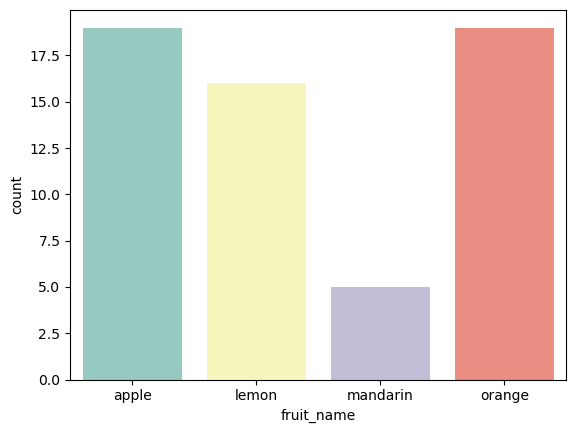

In [3]:
fruit = pd.read_csv('fruits.csv')

fruit['fruit_name'] = fruit['fruit_name'].astype('category')

sns.countplot(x='fruit_name', data=fruit, label="Count", palette="Set3")
plt.show()

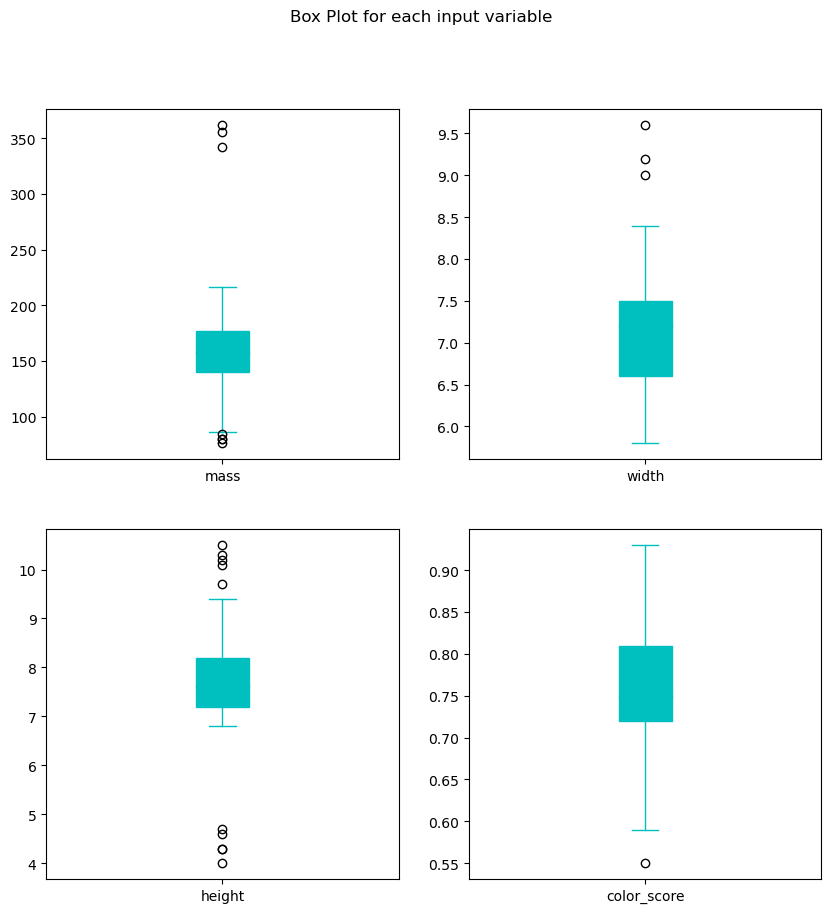

In [4]:
fruit.drop('fruit_label', axis=1).plot(kind='box', subplots=True, layout=(2,2),
                                        sharex=False, sharey=False, figsize=(10,10),
                                        color='c', patch_artist=True)
plt.suptitle("Box Plot for each input variable")
plt.savefig('fruits_boxplot')
plt.show()

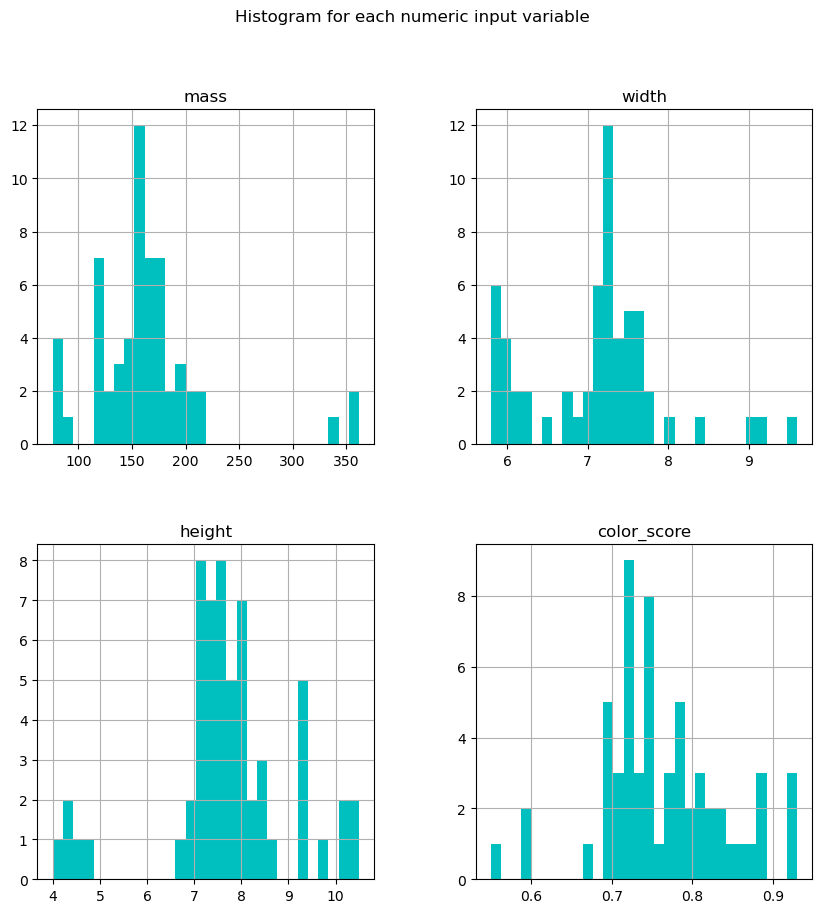

In [5]:
fruit.drop('fruit_label', axis=1).hist(bins=30, figsize=(10,10), color="c", ec="m", lw=0)
plt.suptitle("Histogram for each numeric input variable")
plt.savefig('fruits_histogram')
plt.show()


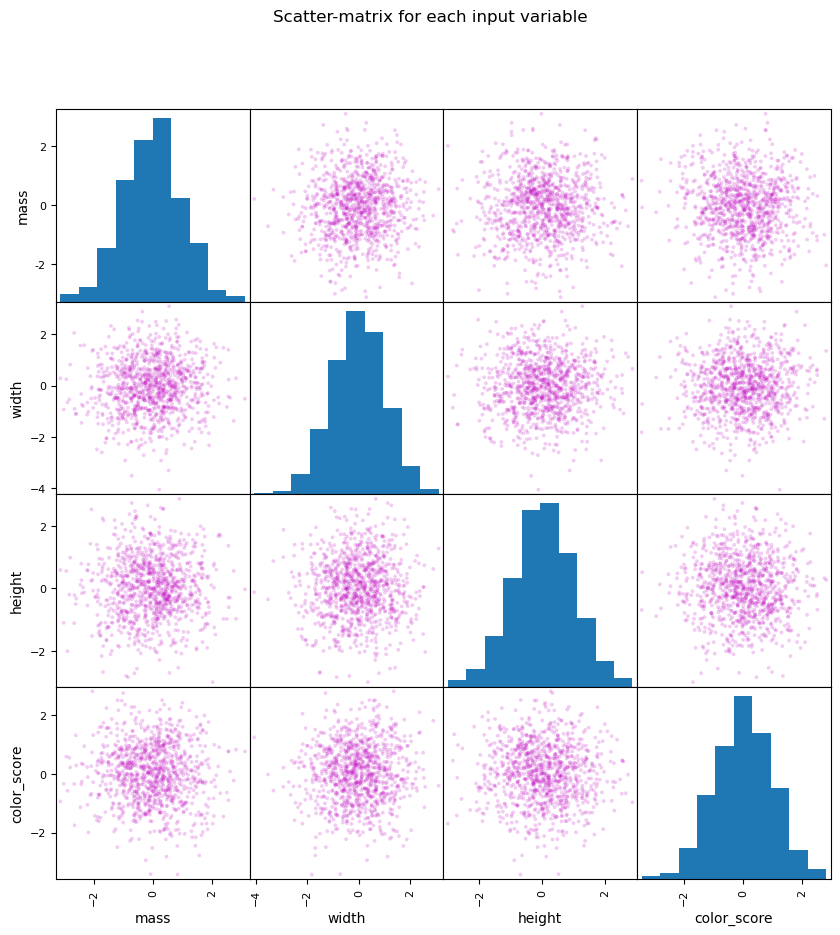

In [6]:
df = pd.DataFrame(np.random.randn(1000, 4), columns=['mass', 'width', 'height', 'color_score'])
scatter_matrix(df, alpha=0.2, figsize=(10,10), marker='.', s=30, hist_kwds={'bins':10}, range_padding=0.05, color='m')
plt.suptitle('Scatter-matrix for each input variable')
plt.savefig('fruit_scatter_matrix')
plt.show()


In [7]:
X = fruit[['mass', 'width', 'height', 'color_score']]
y = fruit['fruit_name']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
print("Accuracy for K=5:", knn.score(X_test, y_test))

Accuracy for K=5: 0.5833333333333334


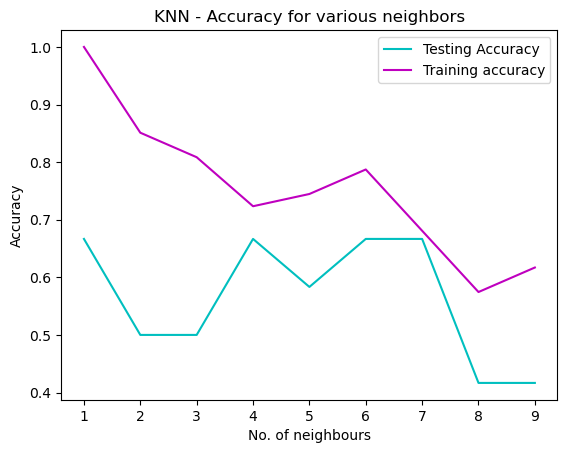

In [8]:
neighbours = np.arange(1,10)
training_accuracy = np.empty(len(neighbours))
testing_accuracy = np.empty(len(neighbours))
for i, k in enumerate(neighbours):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    training_accuracy[i] = knn.score(X_train, y_train)
    testing_accuracy[i] = knn.score(X_test, y_test)

plt.title('KNN - Accuracy for various neighbors')
plt.plot(neighbours, testing_accuracy, label='Testing Accuracy', color='c')
plt.plot(neighbours, training_accuracy, label='Training accuracy', color='m')
plt.legend()
plt.xlabel('No. of neighbours')
plt.ylabel('Accuracy')
plt.show()

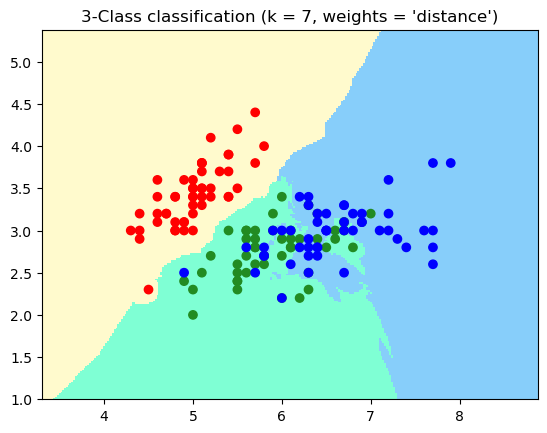

In [9]:
iris = load_iris()
X = iris.data[:, :2]
y = iris.target
h = .02
n_neighbors = 7

cmap_light = ListedColormap(['#FFFACD', '#7FFFD4', '#87CEFA'])
cmap_bold = ListedColormap(['#FF0000', '#228B22', '#0000FF'])

for weights in ['distance']:
    clf = neighbors.KNeighborsClassifier(n_neighbors, weights=weights)
    clf.fit(X, y)

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("3-Class classification (k = %i, weights = '%s')" % (n_neighbors, weights))

plt.show()